In [1]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px

In [2]:
import warnings
warnings.filterwarnings('ignore')

# 1. Data Understanding and Exploration

This dataset shows the information of bikes ordered on a specific date and other parameters of the orders.


```instant``` => Serial Number.

```dteday``` => Date.

```season``` => The ongoing season on a date.

```yr, mnth``` => Year and month on the specific date.

```holiday, weekday``` => tells wheather it was a working day or a holiday.

```weathersit``` => Tells the situation of weather on a specific date.

```temp, atemp```=> Tells the temprature information on a specific date.

```hum, windspeed``` => Humidity and windspeed on the day

```casual``` => The number of bookings which were made without reservations on that day.

```registered``` => The number of bookings which were made without reservations on that day

```cnt``` => Total number of bookings on that day.

In [3]:
# Reading the dataset

dataset = pd.read_csv('day.csv')
dataset

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [4]:
dataset.shape

(730, 16)

In [5]:
dataset.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [6]:
dataset.isnull().sum(axis = 0)

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


## Decoding the data

## Assigning string values to different seasons instead of numeric values

In [8]:
# 1 => Winter
dataset.loc[(dataset['season'] == 1), 'season'] = 'Winter'
# 2 => Spring
dataset.loc[(dataset['season'] == 2), 'season'] = 'Spring'
# 3 => Summer
dataset.loc[(dataset['season'] == 3), 'season'] = 'Summer'
# 4 => Fall
dataset.loc[(dataset['season'] == 4), 'season'] = 'Fall'
dataset

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,Winter,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,Winter,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,Winter,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,Winter,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,Winter,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,Winter,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,Winter,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,Winter,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,Winter,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [9]:
dataset['season'].astype("category").value_counts()

Summer    188
Spring    184
Winter    180
Fall      178
Name: season, dtype: int64

## Assigning string values to different months instead of numeric values

In [10]:
def object_map_mnths(x):
    return x.map({1 : 'January', 2 : 'February', 3 : 'March', 4 : 'April', 5 : 'May', 6 : 'June', 7 : 'July', 8 : 'August',
                 9 : 'September', 10 : 'October', 11 : 'November', 12 : 'December'})

In [11]:
dataset[['mnth']] = dataset[['mnth']].apply(object_map_mnths)
dataset

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,Winter,0,January,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,Winter,0,January,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,Winter,0,January,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,Winter,0,January,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,Winter,0,January,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,Winter,1,December,0,5,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,Winter,1,December,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,Winter,1,December,0,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,Winter,1,December,0,1,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [12]:
dataset['mnth'].astype('category').value_counts()

August       62
December     62
January      62
July         62
March        62
May          62
October      62
April        60
June         60
November     60
September    60
February     56
Name: mnth, dtype: int64

## Assigning string values to different weekdays instead of numeric values

In [13]:
def str_map_weekday(x):
    return x.map({0 : 'Sunday',
                  1 : 'Monday',
                  2 : 'Tuesday',
                  3 : 'Wednesday',
                  4 : 'Thursday',
                  5 : 'Friday',
                  6 : 'Saturday'
                 })

In [14]:
dataset[['weekday']] = dataset[['weekday']].apply(str_map_weekday)

In [15]:
dataset['weekday'].astype('category').value_counts()

Monday       105
Tuesday      105
Friday       104
Saturday     104
Sunday       104
Thursday     104
Wednesday    104
Name: weekday, dtype: int64

In [16]:
dataset.loc[(dataset['weathersit'] == 1), 'weathersit'] = 'Clear, Partly Cloudy'
dataset.loc[(dataset['weathersit'] == 2), 'weathersit'] = 'Cloudy, Mist'
dataset.loc[(dataset['weathersit'] == 3), 'weathersit'] = 'Rain, Snow'

In [17]:
dataset['weathersit'].astype('category').value_counts()

Clear, Partly Cloudy    463
Cloudy, Mist            246
Rain, Snow               21
Name: weathersit, dtype: int64

In [18]:
dataset.describe()

,instant,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,0.500000,0.028767,0.690411,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,0.500343,0.167266,0.462641,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [19]:
dataset.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,Winter,0,January,0,Monday,1,"Cloudy, Mist",14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,Winter,0,January,0,Tuesday,1,"Cloudy, Mist",14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,Winter,0,January,0,Wednesday,1,"Clear, Partly Cloudy",8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,Winter,0,January,0,Thursday,1,"Clear, Partly Cloudy",8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,Winter,0,January,0,Friday,1,"Clear, Partly Cloudy",9.305237,11.46350,43.6957,12.522300,82,1518,1600


# 2. Data Visualization/EDA(Exploratory Data Analysis)

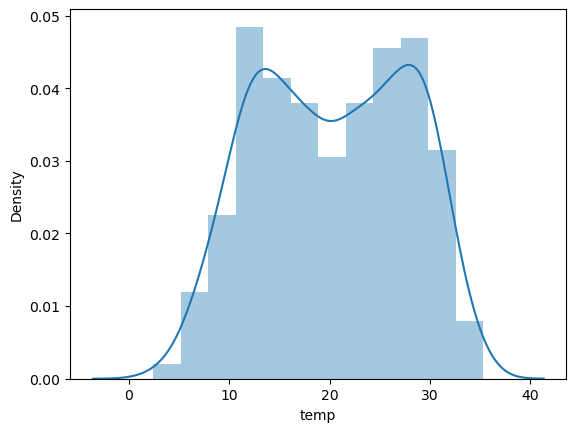

In [20]:
# Temprature

sns.distplot(dataset['temp'])
plt.show()

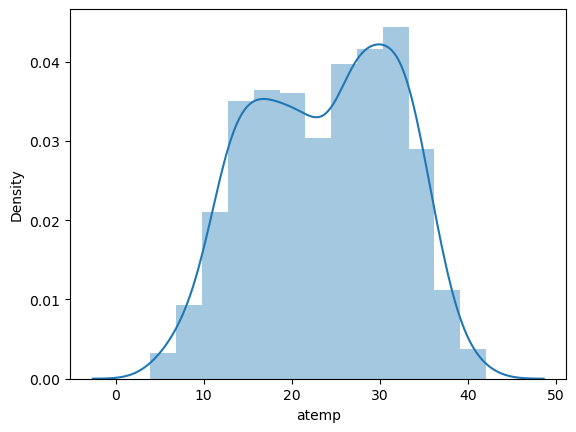

In [21]:
# Actual Temprature

sns.distplot(dataset['atemp'])
plt.show()

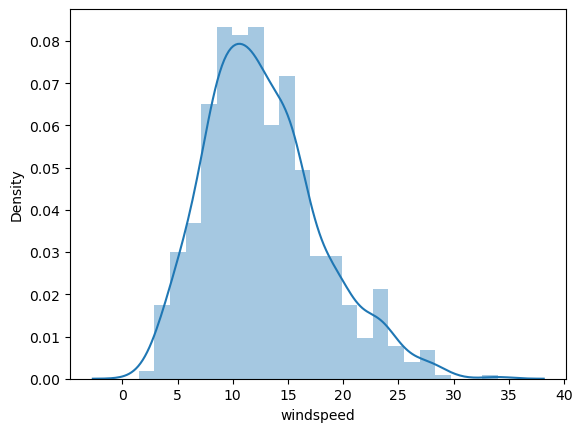

In [22]:
# Windspeed

sns.distplot(dataset['windspeed'])
plt.show()

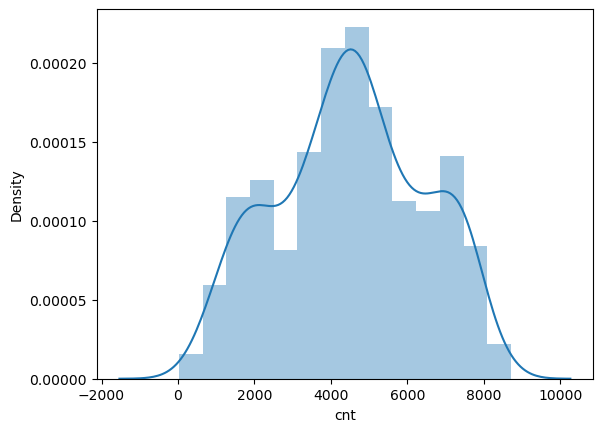

In [23]:
# Target variable: count of total rental bikes including both casual and registered

sns.distplot(dataset['cnt'])
plt.show()

In [24]:
# Converting to date-time format

dataset['dteday'] = dataset['dteday'].astype('datetime64')

In [25]:
dataset_categorical = dataset.select_dtypes(exclude = ['float64', 'datetime64', 'int64'])

In [26]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    object        
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    object        
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    object        
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    object        
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

In [27]:
dataset_categorical.columns

Index(['season', 'mnth', 'weekday', 'weathersit'], dtype='object')

In [28]:
dataset_categorical

,season,mnth,weekday,weathersit
0,Winter,January,Monday,"Cloudy, Mist"
1,Winter,January,Tuesday,"Cloudy, Mist"
2,Winter,January,Wednesday,"Clear, Partly Cloudy"
3,Winter,January,Thursday,"Clear, Partly Cloudy"
4,Winter,January,Friday,"Clear, Partly Cloudy"
...,...,...,...,...
725,Winter,December,Friday,"Cloudy, Mist"
726,Winter,December,Saturday,"Cloudy, Mist"
727,Winter,December,Sunday,"Cloudy, Mist"
728,Winter,December,Monday,"Clear, Partly Cloudy"


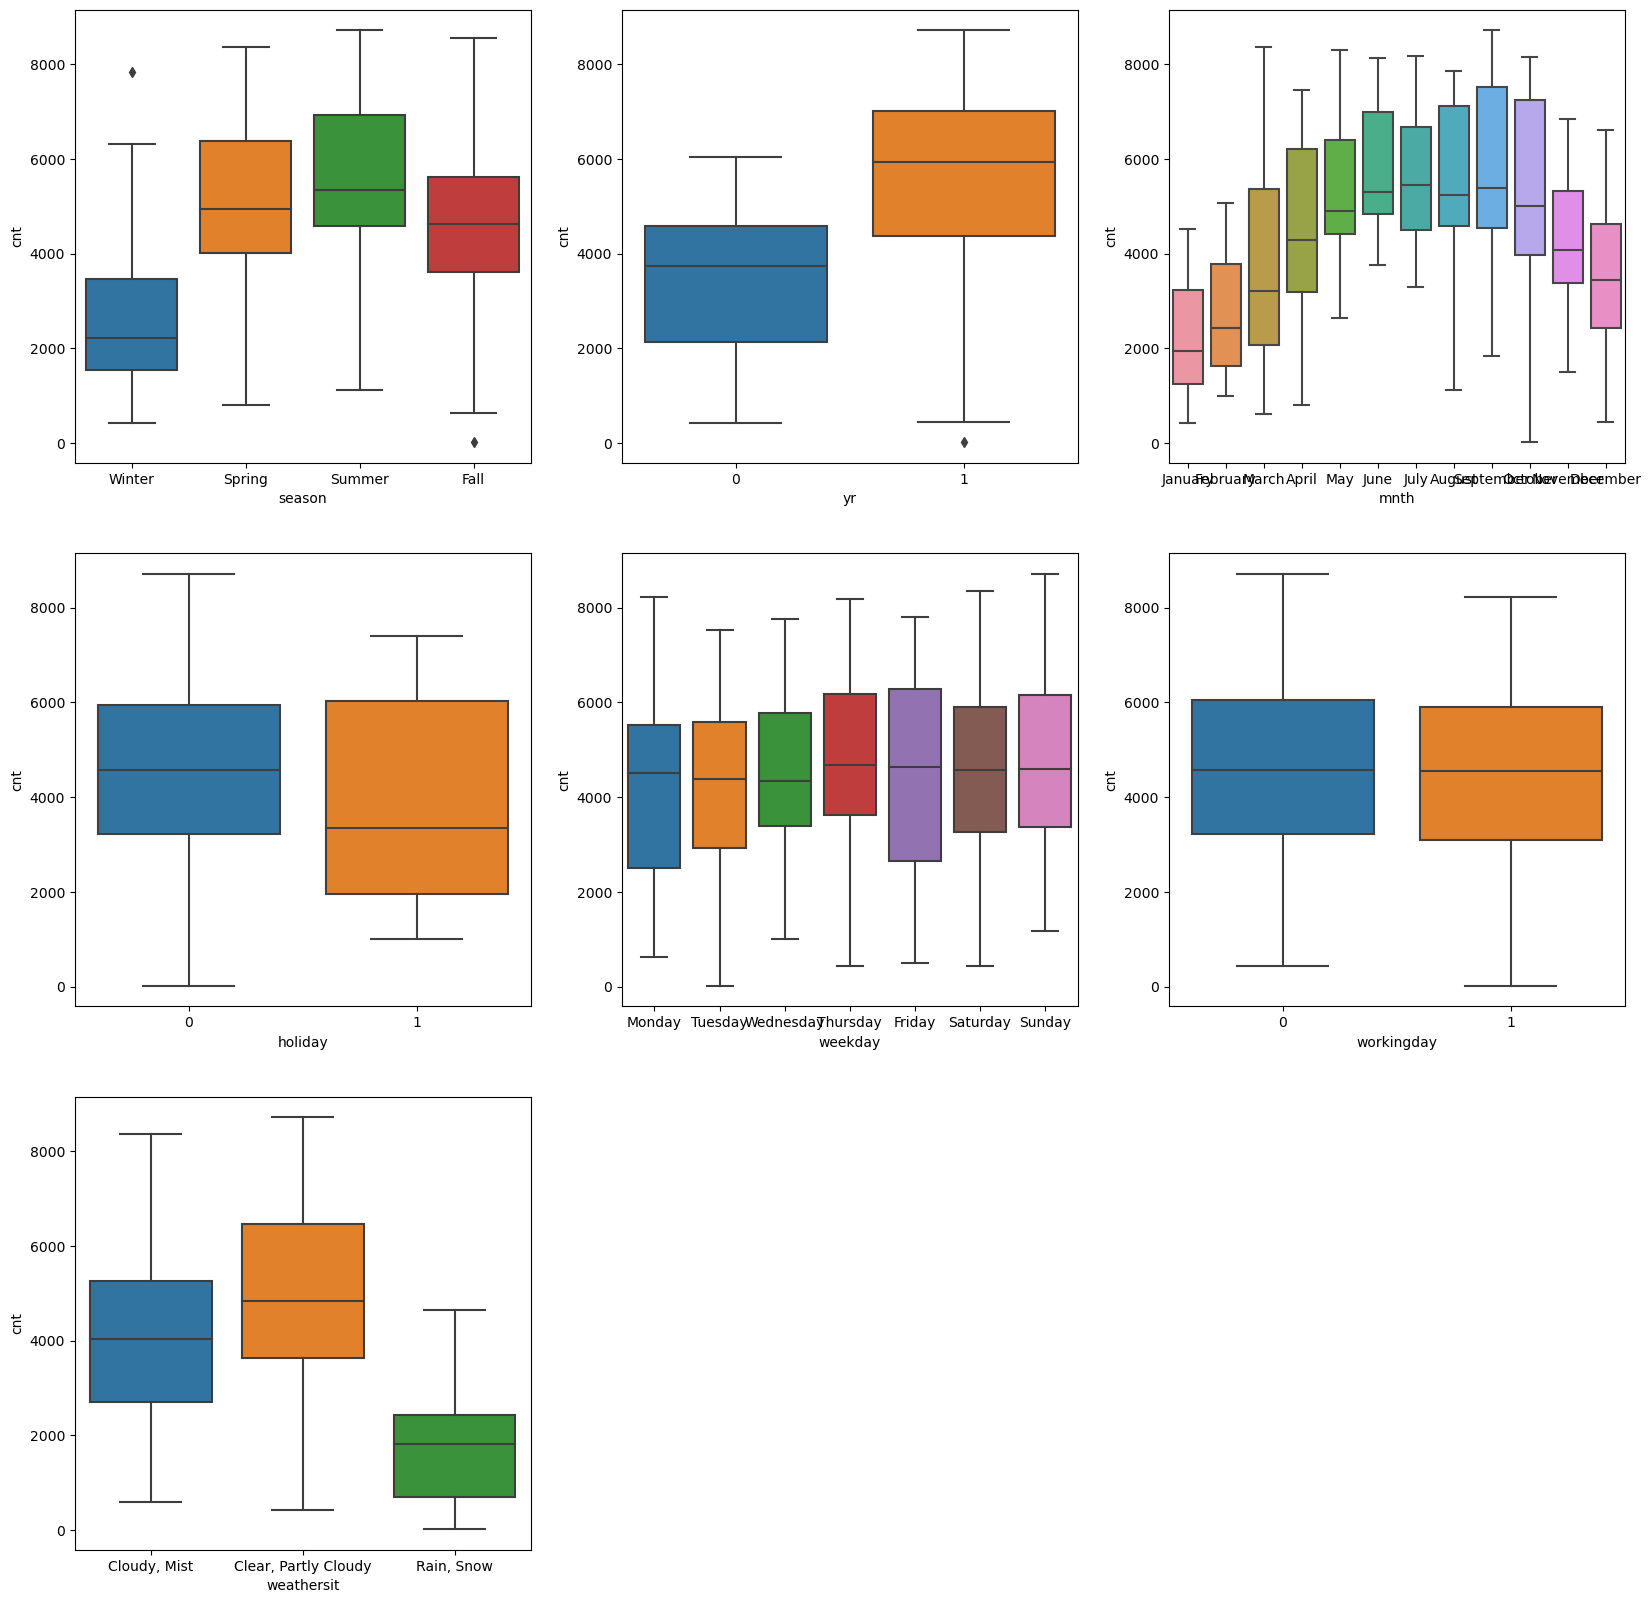

In [29]:
plt.figure(figsize = (20,20))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = dataset)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = dataset)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = dataset)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = dataset)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = dataset)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = dataset)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = dataset)
plt.show()

In [30]:
intVarlist = ["casual", "registered", "cnt"]

In [31]:
for var in intVarlist:
    dataset[var] = dataset[var].astype("float")

In [32]:
dataset_numeric = dataset.select_dtypes(include = ['float64'])
dataset_numeric.head()

,temp,atemp,hum,windspeed,casual,registered,cnt
0,14.110847,18.18125,80.5833,10.749882,331.0,654.0,985.0
1,14.902598,17.68695,69.6087,16.652113,131.0,670.0,801.0
2,8.050924,9.47025,43.7273,16.636703,120.0,1229.0,1349.0
3,8.200000,10.60610,59.0435,10.739832,108.0,1454.0,1562.0
4,9.305237,11.46350,43.6957,12.522300,82.0,1518.0,1600.0


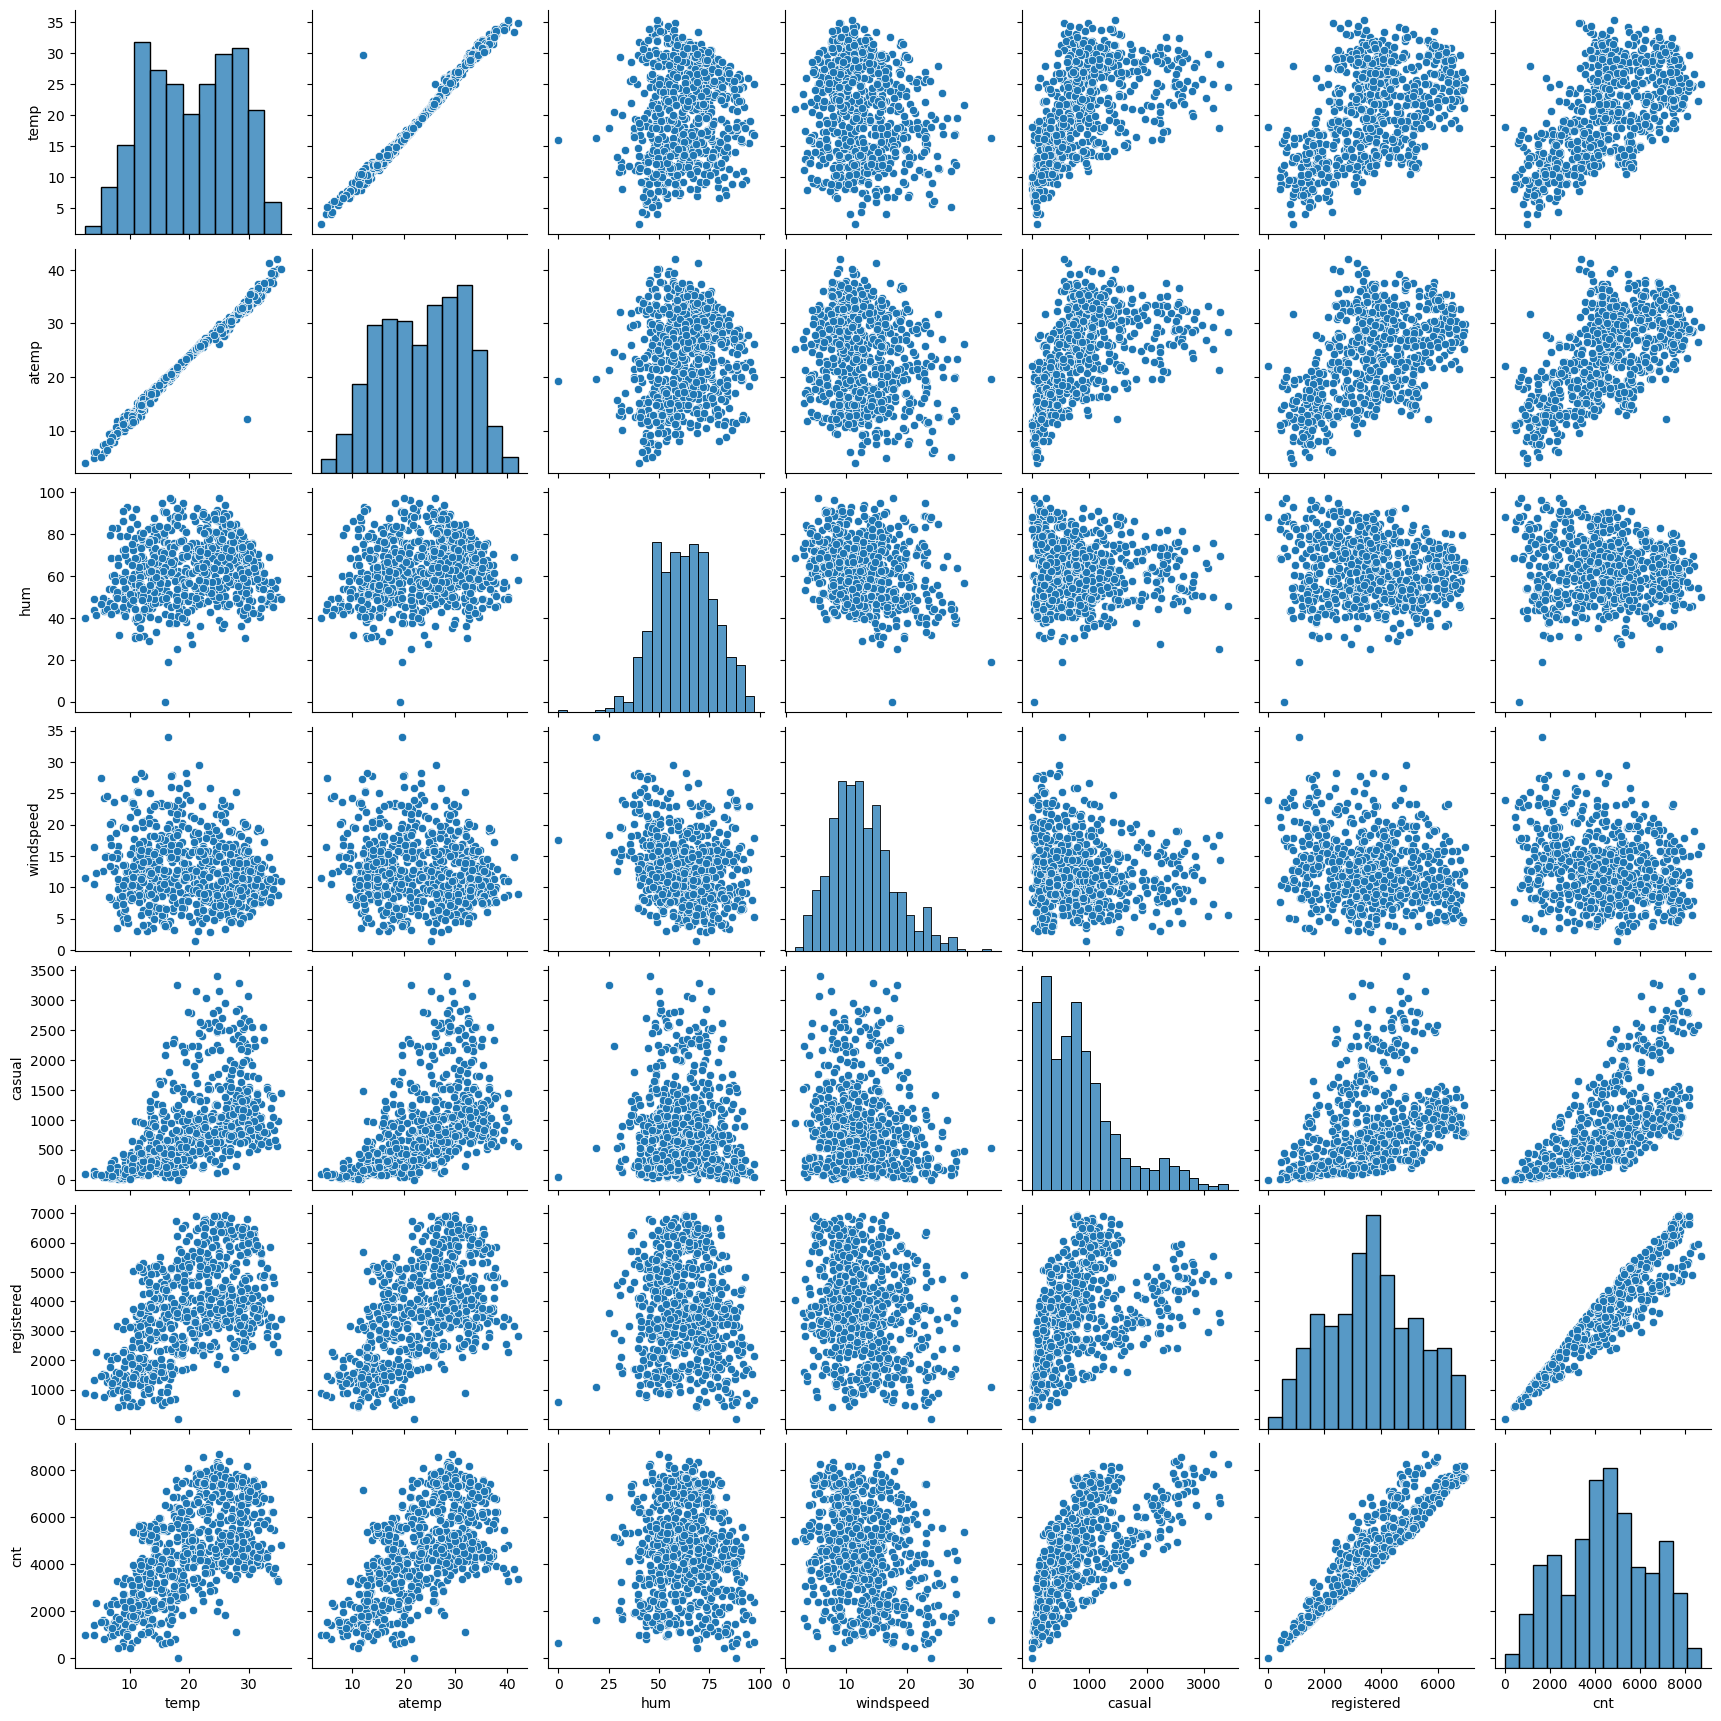

In [33]:
sns.pairplot(dataset_numeric)
plt.show()

In [34]:
cor = dataset_numeric.corr()
cor

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914,-0.235132
casual,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137,0.672123
registered,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000,0.945411
cnt,0.627044,0.630685,-0.098543,-0.235132,0.672123,0.945411,1.000000


<Axes: >

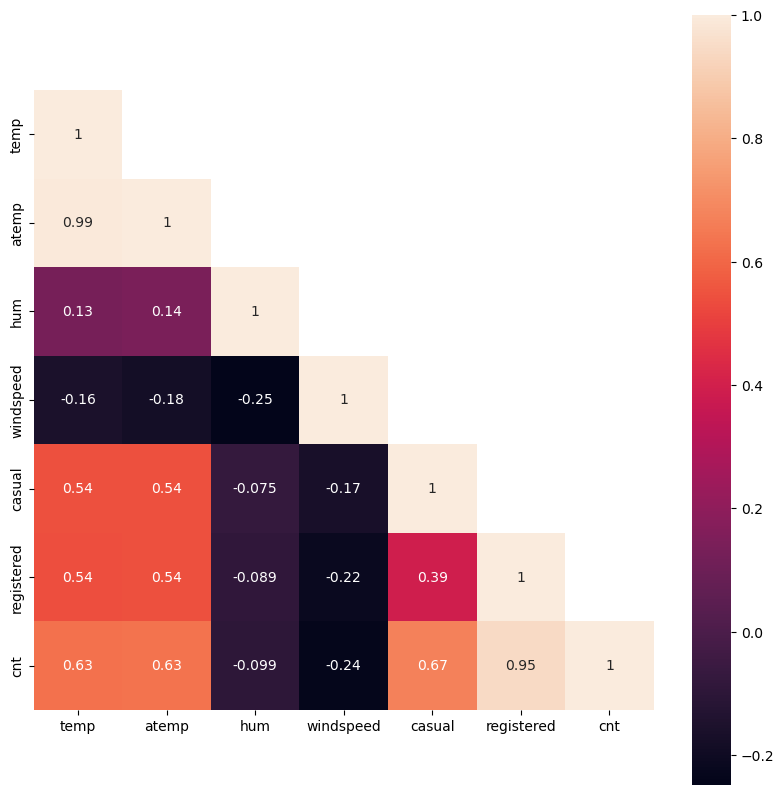

In [35]:
mask = np.array(cor)
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
sns.heatmap(cor, mask = mask, vmax = 1, square = True, annot = True)

In [36]:
dataset.drop('atemp', axis = 1, inplace = True)
dataset.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,Winter,0,January,0,Monday,1,"Cloudy, Mist",14.110847,80.5833,10.749882,331.0,654.0,985.0
1,2,2018-02-01,Winter,0,January,0,Tuesday,1,"Cloudy, Mist",14.902598,69.6087,16.652113,131.0,670.0,801.0
2,3,2018-03-01,Winter,0,January,0,Wednesday,1,"Clear, Partly Cloudy",8.050924,43.7273,16.636703,120.0,1229.0,1349.0
3,4,2018-04-01,Winter,0,January,0,Thursday,1,"Clear, Partly Cloudy",8.200000,59.0435,10.739832,108.0,1454.0,1562.0
4,5,2018-05-01,Winter,0,January,0,Friday,1,"Clear, Partly Cloudy",9.305237,43.6957,12.522300,82.0,1518.0,1600.0


#  3. Data Preparation

In [37]:
dataset_categorical = dataset.select_dtypes(include = ['object'])

In [38]:
dataset_categorical.head()

,season,mnth,weekday,weathersit
0,Winter,January,Monday,"Cloudy, Mist"
1,Winter,January,Tuesday,"Cloudy, Mist"
2,Winter,January,Wednesday,"Clear, Partly Cloudy"
3,Winter,January,Thursday,"Clear, Partly Cloudy"
4,Winter,January,Friday,"Clear, Partly Cloudy"


In [39]:
dataset_dummies = pd.get_dummies(dataset_categorical, drop_first = True)

In [40]:
dataset_dummies.head()

,season_Spring,season_Summer,season_Winter,mnth_August,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,"weathersit_Cloudy, Mist","weathersit_Rain, Snow"
0,0,0,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
# Drop categorical variables columns
dataset = dataset.drop(list(dataset_categorical.columns), axis = 1)

In [42]:
dataset.head()

,instant,dteday,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,0,0,1,14.110847,80.5833,10.749882,331.0,654.0,985.0
1,2,2018-02-01,0,0,1,14.902598,69.6087,16.652113,131.0,670.0,801.0
2,3,2018-03-01,0,0,1,8.050924,43.7273,16.636703,120.0,1229.0,1349.0
3,4,2018-04-01,0,0,1,8.200000,59.0435,10.739832,108.0,1454.0,1562.0
4,5,2018-05-01,0,0,1,9.305237,43.6957,12.522300,82.0,1518.0,1600.0


In [43]:
# Concatenate dummy variables with the dataset

dataset = pd.concat([dataset, dataset_dummies], axis = 1)

In [44]:
dataset.head()

,instant,dteday,yr,holiday,workingday,temp,hum,windspeed,casual,registered,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,"weathersit_Cloudy, Mist","weathersit_Rain, Snow"
0,1,2018-01-01,0,0,1,14.110847,80.5833,10.749882,331.0,654.0,...,0,0,1,0,0,0,0,0,1,0
1,2,2018-02-01,0,0,1,14.902598,69.6087,16.652113,131.0,670.0,...,0,0,0,0,0,0,1,0,1,0
2,3,2018-03-01,0,0,1,8.050924,43.7273,16.636703,120.0,1229.0,...,0,0,0,0,0,0,0,1,0,0
3,4,2018-04-01,0,0,1,8.200000,59.0435,10.739832,108.0,1454.0,...,0,0,0,0,0,1,0,0,0,0
4,5,2018-05-01,0,0,1,9.305237,43.6957,12.522300,82.0,1518.0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
dataset = dataset.drop(['instant', 'dteday'], axis = 1, inplace = False)

In [46]:
dataset.head()

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_Spring,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,"weathersit_Cloudy, Mist","weathersit_Rain, Snow"
0,0,0,1,14.110847,80.5833,10.749882,331.0,654.0,985.0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,1,14.902598,69.6087,16.652113,131.0,670.0,801.0,0,...,0,0,0,0,0,0,1,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,120.0,1229.0,1349.0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,108.0,1454.0,1562.0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,82.0,1518.0,1600.0,0,...,0,0,0,0,0,0,0,0,0,0


# 4. Model Building

In [47]:
# Importing Libraries

from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [48]:
# Split the dataframe into train and test datasets

from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(dataset, train_size = 0.7, test_size = 0.3, random_state=100)

In [49]:
# Data Scaling

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

#Applying scaler to all columns except dummy variables

var = ["temp", "hum", "windspeed", "casual", "registered", "cnt"]

df_train[var] = scaler.fit_transform(df_train[var])

In [50]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_Spring,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,"weathersit_Cloudy, Mist","weathersit_Rain, Snow"
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.650369,0.320768,0.254661,0.523944,0.513620,0.245098,...,0.086275,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.343137,0.029412
std,0.500429,0.157763,0.453386,0.225844,0.145882,0.169797,0.206011,0.228175,0.224593,0.430568,...,0.281045,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.094179,0.353487,0.356420,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.212740,0.525123,0.518638,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.327415,0.696073,0.684710,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


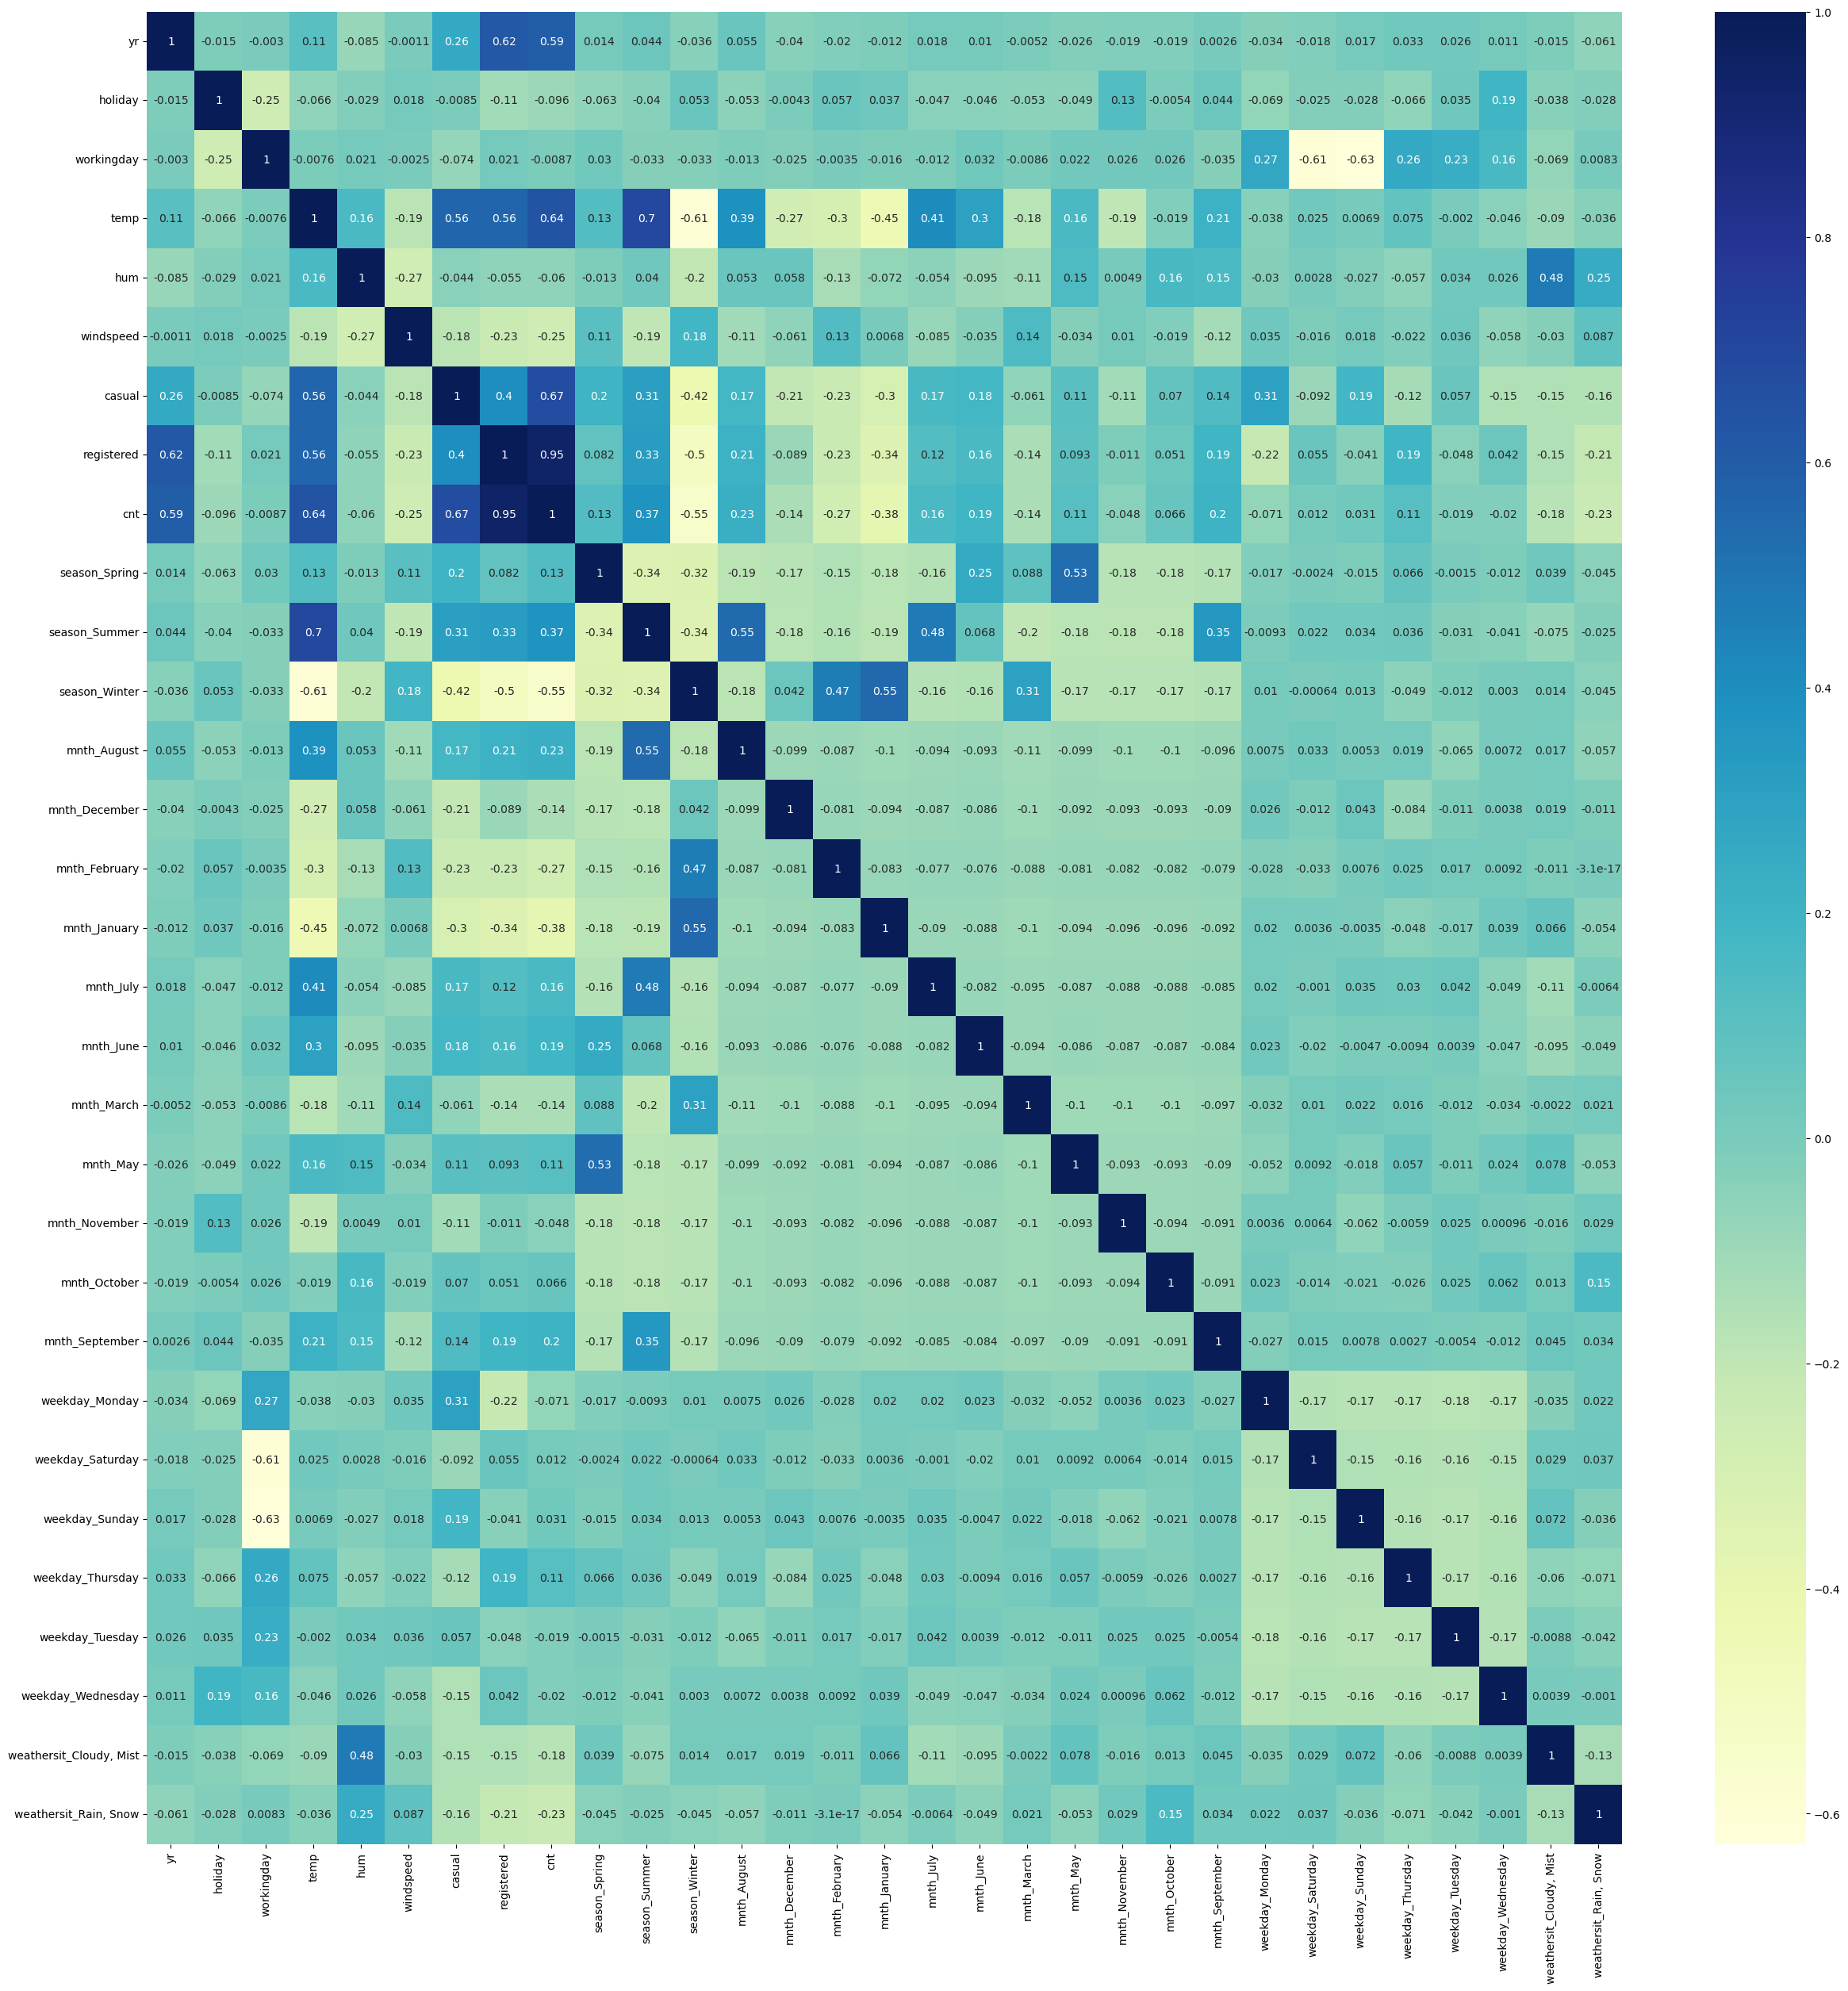

In [51]:
# Checking the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (30, 30))
sns.heatmap(df_train.corr(), annot = True, cmap = "YlGnBu")
plt.show()

In [52]:
# Dividing into X and y

X_train = df_train.drop(["casual", "registered", "cnt"], axis = 1)
y_train = df_train.pop("cnt")

In [53]:
# np.array(X_train)

In [54]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr = sm.OLS(y_train, X_train_lm).fit()

In [55]:
X_train_lm

,const,yr,holiday,workingday,temp,hum,windspeed,season_Spring,season_Summer,season_Winter,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,"weathersit_Cloudy, Mist","weathersit_Rain, Snow"
653,1.0,1,0,1,0.509887,0.575354,0.300794,0,0,0,...,1,0,0,0,0,0,0,1,0,0
576,1.0,1,0,1,0.815169,0.725633,0.264686,0,1,0,...,0,0,0,0,0,0,0,1,0,0
426,1.0,1,0,0,0.442393,0.640189,0.255342,0,0,1,...,0,0,0,0,1,0,0,0,1,0
728,1.0,1,0,1,0.245101,0.498067,0.663106,0,0,1,...,0,0,1,0,0,0,0,0,0,0
482,1.0,1,0,0,0.395666,0.504508,0.188475,1,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1.0,1,0,1,0.824514,0.605840,0.355596,1,0,0,...,0,0,0,0,0,0,1,0,1,0
578,1.0,1,0,1,0.863973,0.679690,0.187140,0,1,0,...,0,0,0,0,0,0,0,0,0,0
53,1.0,0,0,1,0.202618,0.435939,0.111379,0,0,1,...,0,0,0,0,0,0,0,0,0,0
350,1.0,0,0,1,0.248216,0.577930,0.431816,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [56]:
lr.params

const                      0.505440
yr                         0.230857
holiday                   -0.135424
workingday                -0.060524
temp                       0.445458
hum                       -0.157315
windspeed                 -0.183046
season_Spring             -0.068654
season_Summer             -0.110897
season_Winter             -0.154602
mnth_August                0.021507
mnth_December             -0.045669
mnth_February             -0.037279
mnth_January              -0.063612
mnth_July                 -0.034910
mnth_June                  0.000975
mnth_March                 0.000608
mnth_May                   0.024064
mnth_November             -0.041555
mnth_October               0.005790
mnth_September             0.086055
weekday_Monday            -0.024633
weekday_Saturday          -0.056319
weekday_Sunday            -0.049961
weekday_Thursday           0.003863
weekday_Tuesday           -0.026299
weekday_Wednesday         -0.011241
weathersit_Cloudy, Mist   -0

In [57]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [58]:
print(lm.coef_)
print(lm.intercept_)

[ 0.23085682 -0.13542389 -0.06052424  0.44545797 -0.15731473 -0.18304612
 -0.06865405 -0.11089693 -0.15460167  0.02150709 -0.04566922 -0.03727876
 -0.06361179 -0.03490968  0.00097451  0.00060798  0.02406416 -0.04155465
  0.00578994  0.08605503 -0.02463298 -0.05631912 -0.04996141  0.00386328
 -0.02629921 -0.01124081 -0.05935514 -0.25151085]
0.5054397817116745


In [59]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     98.04
Date:                Thu, 04 Apr 2024   Prob (F-statistic):          4.33e-179
Time:                        19:51:56   Log-Likelihood:                 523.81
No. Observations:                 510   AIC:                            -989.6
Df Residuals:                     481   BIC:                            -866.8
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.5054      0.087      5.835      0.000       0.335       0.676
yr                          0.2309      0.008     28.387      0.000       0.215       0.247
holiday                    -0.1354      0.065     -2.072      0.039      -0.264      -0.007
workingday                 -0.0605      0.071     -0.852      0.395      -0.200       0.079
temp                        0.4455      0.047      9.513      0.000       0.353       0.537
hum                        -0.1573      0.039     -4.049      0.000      -0.234      -0.081
windspeed                  -0.1830      0.026     -7.036      0.000      -0.234      -0.132
season_Spring              -0.0687      0.030     -2.284      0.023      -0.128      -0.010
season_Summer              -0.1109      0.028     -3.938      0.000      -0.166      -0.056
season_Winter              -0.1546      0.026     -5.894      0.000      -0.206      -0.103
mnth_August                 0.0215      0.034      0.632      0.527      -0.045       0.088
mnth_December              -0.0457      0.034     -1.348      0.178      -0.112       0.021
mnth_February              -0.0373      0.033     -1.121      0.263      -0.103       0.028
mnth_January               -0.0636      0.034     -1.880      0.061      -0.130       0.003
mnth_July                  -0.0349      0.035     -0.985      0.325      -0.105       0.035
mnth_June                   0.0010      0.025      0.038      0.969      -0.049       0.051
mnth_March                  0.0006      0.025      0.025      0.980      -0.048       0.049
mnth_May                    0.0241      0.021      1.134      0.257      -0.018       0.066
mnth_November              -0.0416      0.037     -1.133      0.258      -0.114       0.031
mnth_October                0.0058      0.036      0.160      0.873      -0.065       0.077
mnth_September              0.0861      0.032      2.667      0.008       0.023       0.149
weekday_Monday             -0.0246      0.015     -1.690      0.092      -0.053       0.004
weekday_Saturday           -0.0563      0.072     -0.787      0.432      -0.197       0.084
weekday_Sunday             -0.0500      0.071     -0.699      0.485      -0.190       0.091
weekday_Thursday            0.0039      0.015      0.258      0.796      -0.026       0.033
weekday_Tuesday            -0.0263      0.015     -1.792      0.074      -0.055       0.003
weekday_Wednesday          -0.0112      0.015     -0.736      0.462      -0.041       0.019
weathersit_Cloudy, Mist    -0.0594      0.011     -5.637      0.000      -0.080      -0.039
weathersit_Rain, Snow      -0.2515      0.027     -9.455      0.000      -0.304      -0.199
==============================================================================
Omnibus:                       78.889   Durbin-Watson:      

## Using RFE(Recursive Feature Elimination) to reduce the number of inependent variables thus reducing time complexity.

In [60]:
# Import RFE (Recursive Features Elimination)
from sklearn.feature_selection import RFE

In [61]:
lm = LinearRegression()
rfe1 = RFE(lm, n_features_to_select = 15)

# Fit with 15 features
rfe1.fit(X_train, y_train)
print(rfe1.support_)
print(rfe1.ranking_)

[ True  True False  True  True  True  True  True  True False  True False
  True  True False False False  True False  True False False False False
 False False  True  True]
[ 1  1  3  1  1  1  1  1  1  9  1  2  1  1 13 14  6  1 11  1  8  4  5 12
  7 10  1  1]


In [62]:
col1 = X_train.columns[rfe1.support_]

In [63]:
col1

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_Spring',
       'season_Summer', 'season_Winter', 'mnth_December', 'mnth_January',
       'mnth_July', 'mnth_November', 'mnth_September',
       'weathersit_Cloudy, Mist', 'weathersit_Rain, Snow'],
      dtype='object')

In [64]:
X_train_rfe1 = X_train[col1]

X_train_rfe1 = sm.add_constant(X_train_rfe1)
lm1 = sm.OLS(y_train, X_train_rfe1).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Thu, 04 Apr 2024   Prob (F-statistic):          3.34e-189
Time:                        19:51:56   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.4237      0.032     13.153      0.000       0.360       0.487
yr                          0.2303      0.008     28.511      0.000       0.214       0.246
holiday                    -0.0912      0.026     -3.566      0.000      -0.141      -0.041
temp                        0.4800      0.037     12.977      0.000       0.407       0.553
hum                        -0.1602      0.038     -4.240      0.000      -0.234      -0.086
windspeed                  -0.1885      0.026     -7.312      0.000      -0.239      -0.138
season_Spring              -0.0627      0.015     -4.276      0.000      -0.091      -0.034
season_Summer              -0.1034      0.018     -5.763      0.000      -0.139      -0.068
season_Winter              -0.1652      0.016    -10.289      0.000      -0.197      -0.134
mnth_December              -0.0372      0.017     -2.131      0.034      -0.071      -0.003
mnth_January               -0.0437      0.018     -2.415      0.016      -0.079      -0.008
mnth_July                  -0.0555      0.018     -3.046      0.002      -0.091      -0.020
mnth_November              -0.0409      0.019     -2.187      0.029      -0.078      -0.004
mnth_September              0.0749      0.017      4.438      0.000       0.042       0.108
weathersit_Cloudy, Mist    -0.0559      0.010     -5.338      0.000      -0.076      -0.035
weathersit_Rain, Snow      -0.2481      0.026     -9.402      0.000      -0.300      -0.196
==============================================================================
Omnibus:                       67.327   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.896
Skew:                          -0.684   Prob(JB):                     1.56e-36
Kurtosis:                       5.427   Cond. No.                         19.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Using VIF(Variance Inflation Factor) to help identify if variables are highly correlated in a regression model.

In [65]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [66]:
a = X_train_rfe1.drop('const', axis = 1)

In [67]:
# Evaluated VIFs

vif = pd.DataFrame()
vif['features'] = a.columns
vif['VIF'] = [variance_inflation_factor(a.values, i) for i in range(a.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,features,VIF
2,temp,24.59
3,hum,23.41
6,season_Summer,5.36
4,windspeed,4.44
7,season_Winter,3.12
5,season_Spring,3.10
13,"weathersit_Cloudy, Mist",2.24
0,yr,2.06
9,mnth_January,1.78
11,mnth_November,1.65


## Further reducing the number of variables

In [68]:
lm = LinearRegression()
rfe2 = RFE(lm, n_features_to_select = 7)

rfe2.fit(a, y_train)
print(rfe2.support_)
print(rfe2.ranking_)

[ True False  True  True  True False False  True False False False False
  True False  True]
[1 3 1 1 1 6 2 1 9 7 5 8 1 4 1]


In [69]:
col2 = a.columns[rfe2.support_]
col2

X_train_rfe2 = a[col2]

X_train_rfe2 = sm.add_constant(X_train_rfe2)
lm2 = sm.OLS(y_train, X_train_rfe2).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     306.3
Date:                Thu, 04 Apr 2024   Prob (F-statistic):          1.12e-176
Time:                        19:51:56   Log-Likelihood:                 462.41
No. Observations:                 510   AIC:                            -908.8
Df Residuals:                     502   BIC:                            -874.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.4405      0.030     14.651      0.000       0.381       0.500
yr                        0.2323      0.009     26.313      0.000       0.215       0.250
temp                      0.3812      0.025     15.340      0.000       0.332       0.430
hum                      -0.2308      0.033     -6.994      0.000      -0.296      -0.166
windspeed                -0.1923      0.027     -7.014      0.000      -0.246      -0.138
season_Winter            -0.1541      0.013    -11.896      0.000      -0.180      -0.129
mnth_September            0.0671      0.017      4.049      0.000       0.035       0.100
weathersit_Rain, Snow    -0.1963      0.027     -7.246      0.000      -0.250      -0.143
==============================================================================
Omnibus:                       49.777   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               96.080
Skew:                          -0.587   Prob(JB):                     1.37e-21
Kurtosis:                       4.773   Cond. No.                         15.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
# Evaluated VIFs

b = X_train_rfe2.drop('const', axis = 1)
vif1 = pd.DataFrame()
vif1['features'] = b.columns
vif1['VIF'] = [variance_inflation_factor(b.values, i) for i in range(b.shape[1])]
vif1['VIF'] = round(vif1['VIF'], 2)
vif1 = vif1.sort_values(by = 'VIF', ascending = False)
vif1

,features,VIF
2,hum,9.79
1,temp,8.50
3,windspeed,3.90
0,yr,2.03
4,season_Winter,1.79
5,mnth_September,1.16
6,"weathersit_Rain, Snow",1.10


In [71]:
y_train_cnt = lm2.predict(X_train_rfe2)

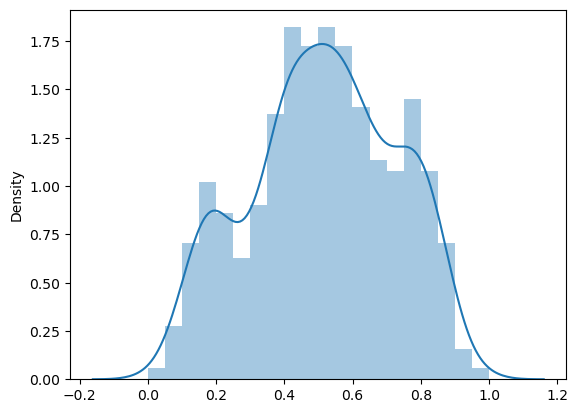

In [72]:
fig = plt.figure()
sns.distplot((y_train, y_train_cnt), bins = 20)
plt.show()

In [73]:
df_test[var] = scaler.transform(df_test[var])
df_test

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_Spring,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,"weathersit_Cloudy, Mist","weathersit_Rain, Snow"
184,0,1,0,0.831783,0.657364,0.084219,0.933557,0.427086,0.692706,0,...,0,0,0,0,0,0,0,1,1,0
535,1,0,1,0.901354,0.610133,0.153728,0.265163,0.767976,0.712034,1,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,0.511964,0.837699,0.334206,0.072539,0.346376,0.303382,0,...,1,0,0,1,0,0,0,0,1,0
221,0,0,1,0.881625,0.437098,0.339570,0.268820,0.559630,0.547400,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.314298,0.537414,0.223712,0.608143,0.569029,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,1,0,1,0.257562,0.708888,0.287411,0.096312,0.376697,0.336516,0,...,0,0,0,0,0,0,1,0,1,0
702,1,0,1,0.519232,0.756118,0.283397,0.167327,0.871354,0.757478,0,...,0,0,0,0,0,0,0,1,0,0
127,0,0,1,0.584649,0.650923,0.069510,0.426394,0.420445,0.495973,1,...,0,0,0,0,0,0,1,0,0,0
640,1,0,1,0.745598,0.817947,0.052115,0.221274,0.985273,0.868615,0,...,1,0,0,0,0,1,0,0,1,0


In [74]:
y_test = df_test.pop('cnt')
x_test = df_test.drop(["casual", "registered"], axis = 1)

In [75]:
x_test.head()

,yr,holiday,workingday,temp,hum,windspeed,season_Spring,season_Summer,season_Winter,mnth_August,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,"weathersit_Cloudy, Mist","weathersit_Rain, Snow"
184,0,1,0,0.831783,0.657364,0.084219,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
535,1,0,1,0.901354,0.610133,0.153728,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,0.511964,0.837699,0.334206,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
221,0,0,1,0.881625,0.437098,0.339570,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.314298,0.537414,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [76]:
c = X_train_rfe2.drop('const', axis = 1)

In [77]:
col2 = c.columns

In [78]:
x_test_rfe2 = x_test[col2]

In [79]:
x_test_rfe2 = sm.add_constant(x_test_rfe2)

In [80]:
x_test_rfe2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   const                  219 non-null    float64
 1   yr                     219 non-null    int64  
 2   temp                   219 non-null    float64
 3   hum                    219 non-null    float64
 4   windspeed              219 non-null    float64
 5   season_Winter          219 non-null    uint8  
 6   mnth_September         219 non-null    uint8  
 7   weathersit_Rain, Snow  219 non-null    uint8  
dtypes: float64(4), int64(1), uint8(3)
memory usage: 10.9 KB


In [81]:
y_test_pred = lm2.predict(x_test_rfe2)

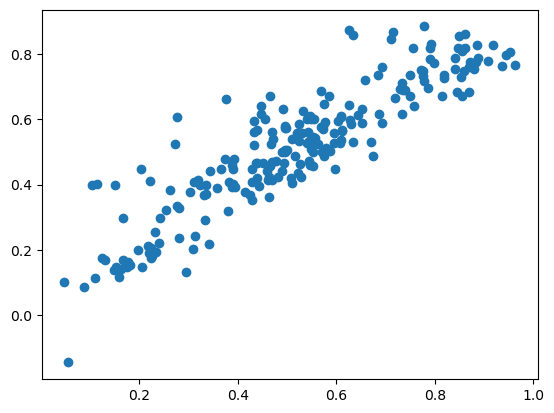

In [82]:
plt.figure()
plt.scatter(y_test, y_test_pred)
plt.show()

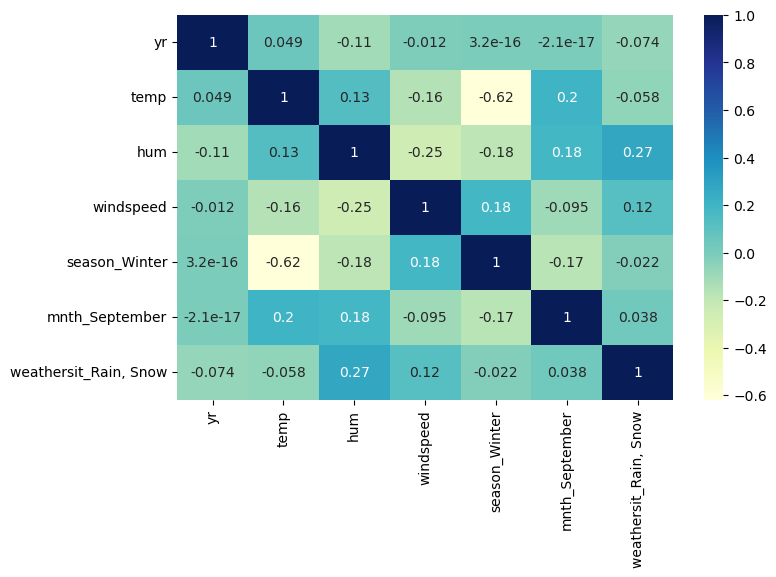

In [83]:
plt.figure(figsize = (8,5))

sns.heatmap(dataset[col2].corr(), cmap = 'YlGnBu', annot = True)
plt.show()

## Accuracy of Model

In [84]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)*100

80.53420746727882

# Accuracy of the Linear Regression Model comes out to be 80% after reducing the number of features from 28 to 7.